In [1]:
import dask.dataframe as dd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
application_train= dd.read_csv("../../data/application_train.csv").compute()
a = application_train.shape
print("application_train shape :({},{})".format( a[0],a[1]))

installments_payments= dd.read_csv("../../data/installments_payments.csv").compute()
a = installments_payments.shape
print("installments_payments shape :({},{})".format( a[0],a[1]))

application_train shape :(307511,122)
installments_payments shape :(13605401,8)


In [3]:
installments_payments=application_train[['TARGET','SK_ID_CURR']].merge(installments_payments,on='SK_ID_CURR',how ='left')
del application_train

<h2>TARGET / DAYS_INSTALMENT (Lorsque le versement du crédit précédent était censé être payé (par rapport à la date de demande du prêt actuel))</h2>

In [7]:
installments_payments.DAYS_INSTALMENT.describe()

count    1.159159e+07
mean    -1.041082e+03
std      7.994779e+02
min     -2.922000e+03
25%     -1.654000e+03
50%     -8.200000e+02
75%     -3.590000e+02
max     -1.000000e+00
Name: DAYS_INSTALMENT, dtype: float64

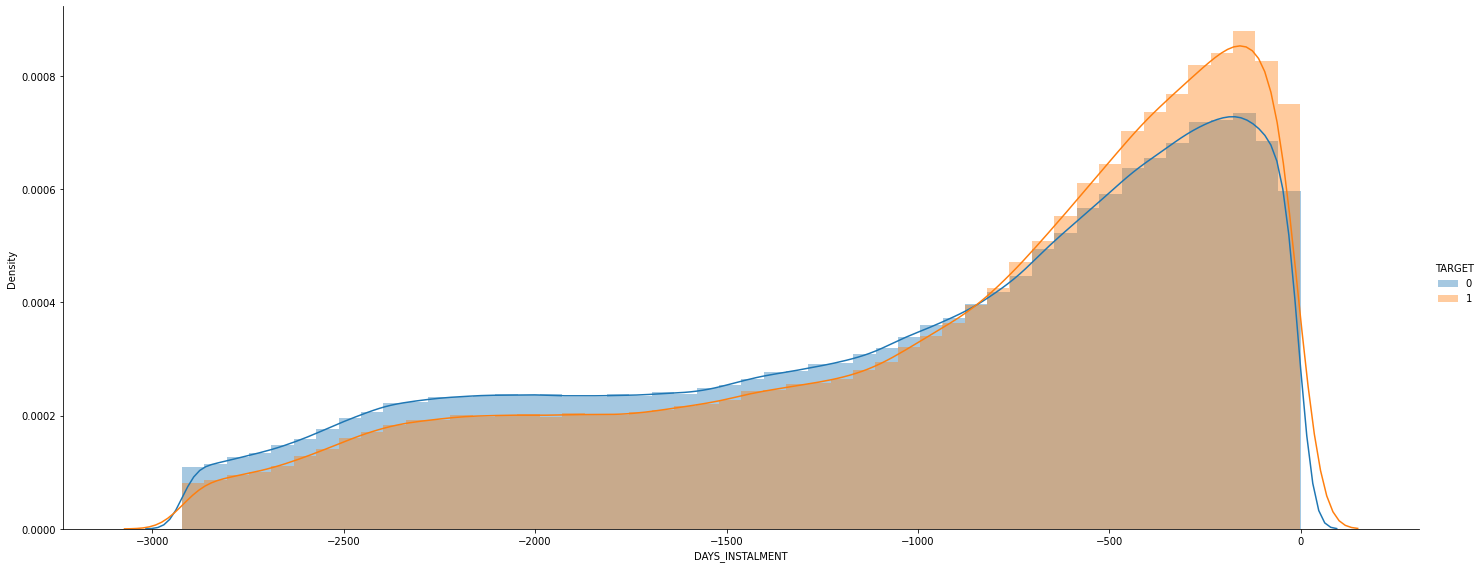

In [8]:
sns.FacetGrid(data=installments_payments, hue='TARGET', aspect=2.5, height=8).map(sns.distplot, 'DAYS_INSTALMENT').add_legend()

<AxesSubplot:xlabel='TARGET', ylabel='DAYS_INSTALMENT'>

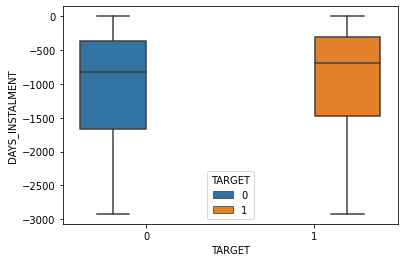

In [18]:
sns.boxplot(x='TARGET', y='DAYS_INSTALMENT',hue='TARGET', data=installments_payments)

<h2>TARGET / DAYS_ENTRY_PAYMENT (À quand remonte les versements du crédit précédent payé (par rapport à la date de demande du prêt actuel))</h2>

In [9]:
installments_payments.DAYS_ENTRY_PAYMENT.describe()

count    1.158901e+07
mean    -1.049898e+03
std      7.990790e+02
min     -4.921000e+03
25%     -1.663000e+03
50%     -8.290000e+02
75%     -3.680000e+02
max     -1.000000e+00
Name: DAYS_ENTRY_PAYMENT, dtype: float64

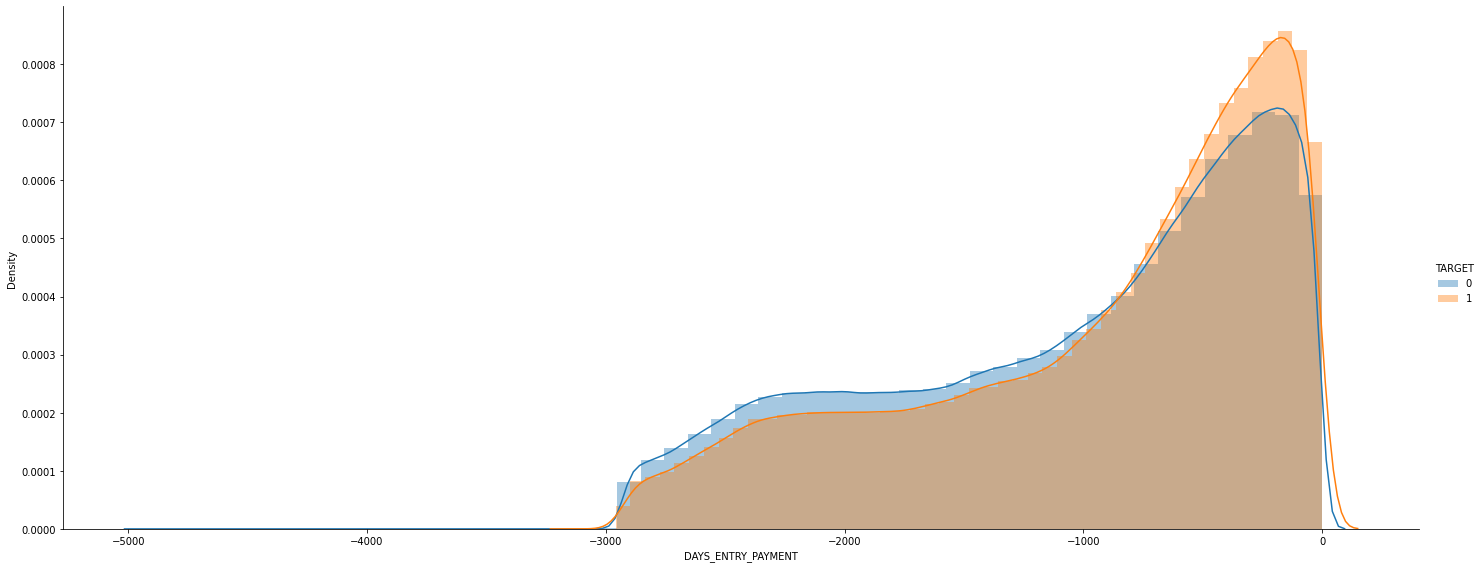

In [10]:
sns.FacetGrid(data=installments_payments, hue='TARGET', aspect=2.5, height=8).map(sns.distplot, 'DAYS_ENTRY_PAYMENT').add_legend()

<AxesSubplot:xlabel='TARGET', ylabel='DAYS_ENTRY_PAYMENT'>

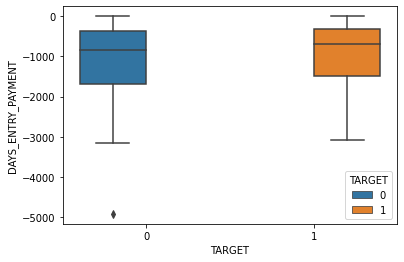

In [17]:
sns.boxplot(x='TARGET', y='DAYS_ENTRY_PAYMENT',hue='TARGET', data=installments_payments)

<h2>TARGET / AMT_INSTALMENT (Quel était le montant du versement prescrit du crédit précédent sur cet épisode)</h2>

In [11]:
installments_payments.AMT_INSTALMENT.describe()

count    1.159159e+07
mean     1.691790e+04
std      5.033127e+04
min      0.000000e+00
25%      4.203675e+03
50%      8.787645e+03
75%      1.655559e+04
max      3.771488e+06
Name: AMT_INSTALMENT, dtype: float64

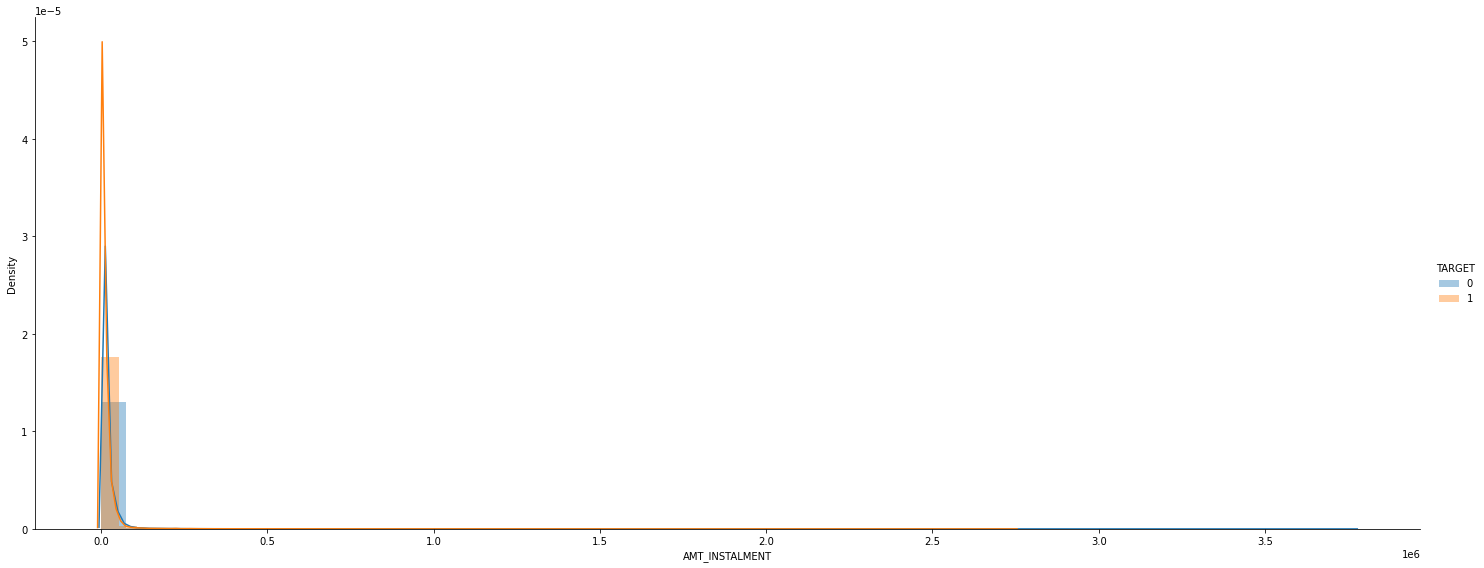

In [12]:
sns.FacetGrid(data=installments_payments, hue='TARGET', aspect=2.5, height=8).map(sns.distplot, 'AMT_INSTALMENT').add_legend()

<AxesSubplot:xlabel='TARGET', ylabel='AMT_INSTALMENT'>

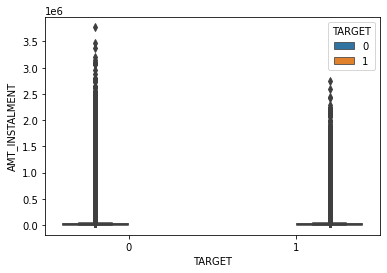

In [16]:
sns.boxplot(x='TARGET', y='AMT_INSTALMENT',hue='TARGET', data=installments_payments)

<h2>TARGET / AMT_PAYMENT (Ce que le client a réellement payé sur le crédit précédent sur cet épisode)</h2>

In [13]:
installments_payments.AMT_PAYMENT.describe()

count    1.158901e+07
mean     1.707693e+04
std      5.445628e+04
min      0.000000e+00
25%      3.378375e+03
50%      8.095410e+03
75%      1.593193e+04
max      3.771488e+06
Name: AMT_PAYMENT, dtype: float64

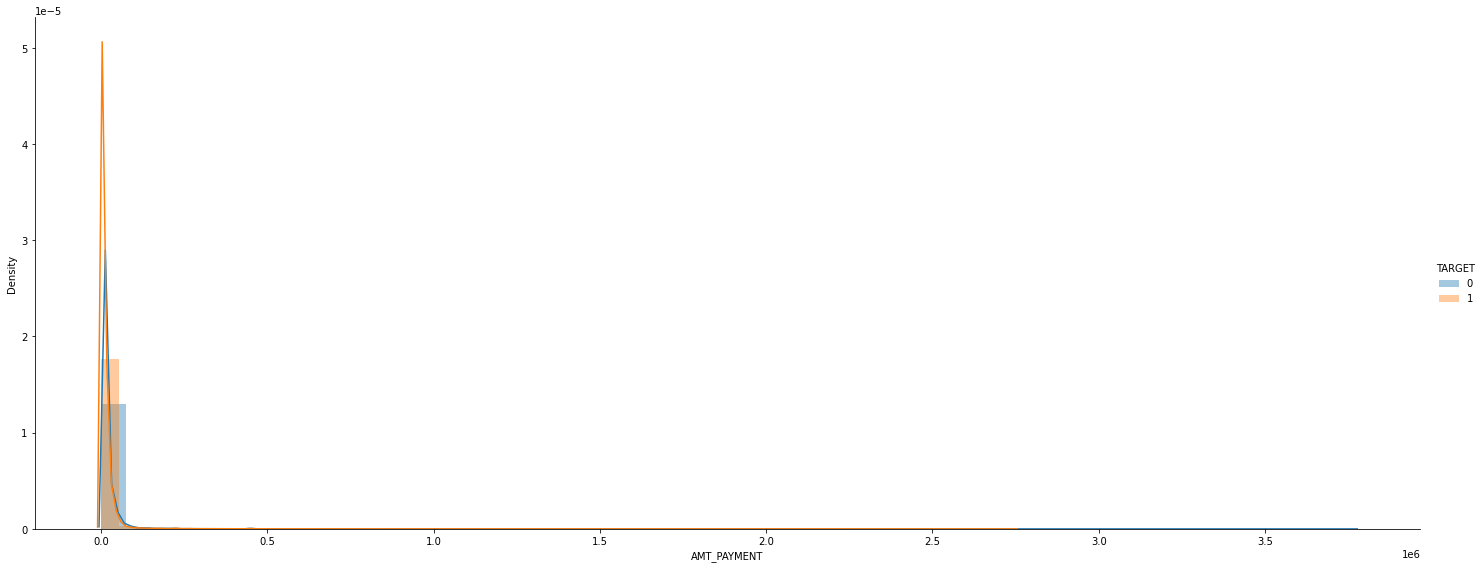

In [14]:
sns.FacetGrid(data=installments_payments, hue='TARGET', aspect=2.5, height=8).map(sns.distplot, 'AMT_PAYMENT').add_legend()

<AxesSubplot:xlabel='TARGET', ylabel='AMT_PAYMENT'>

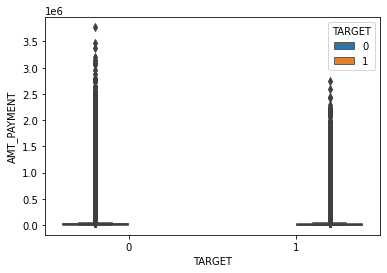

In [15]:
sns.boxplot(x='TARGET', y='AMT_PAYMENT',hue='TARGET', data=installments_payments)

In [19]:
installments_payments.corr(

)

,TARGET,SK_ID_CURR,SK_ID_PREV,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
TARGET,1.000000,-0.002533,-0.000212,-0.009896,-0.016190,0.034974,0.035122,-0.001498,-0.003623
SK_ID_CURR,-0.002533,1.000000,0.002613,0.001442,-0.000794,0.001626,0.001645,-0.000169,0.000009
SK_ID_PREV,-0.000212,0.002613,1.000000,0.002064,-0.001914,0.003143,0.003116,0.002177,0.002056
NUM_INSTALMENT_VERSION,-0.009896,0.001442,0.002064,1.000000,-0.330851,0.130761,0.128592,0.171711,0.179931
NUM_INSTALMENT_NUMBER,-0.016190,-0.000794,-0.001914,-0.330851,1.000000,0.092646,0.096682,-0.089005,-0.086881
DAYS_INSTALMENT,0.034974,0.001626,0.003143,0.130761,0.092646,1.000000,0.999472,0.128686,0.129411
DAYS_ENTRY_PAYMENT,0.035122,0.001645,0.003116,0.128592,0.096682,0.999472,1.000000,0.128254,0.128995
AMT_INSTALMENT,-0.001498,-0.000169,0.002177,0.171711,-0.089005,0.128686,0.128254,1.000000,0.937417
AMT_PAYMENT,-0.003623,0.000009,0.002056,0.179931,-0.086881,0.129411,0.128995,0.937417,1.000000


* Forte corrélation entre AMT_INSTALMENT et AMT_PAYMENT ce qui est logique
* DAYS_ENTRY_PAYMENT et DAYS_INSTALMENT : meme variable